### 1. Numpy의 polyfit으로 회귀(regression) 분석

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from datetime import datetime

In [2]:
path = "c:/Windows/Fonts/malgun.ttf"
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [3]:
pinkwink_web = pd.read_csv('data/PinkWink Web Traffic.csv', 
                                          encoding='utf-8', thousands=',',
                                          names = ['date','hit'], index_col=0)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


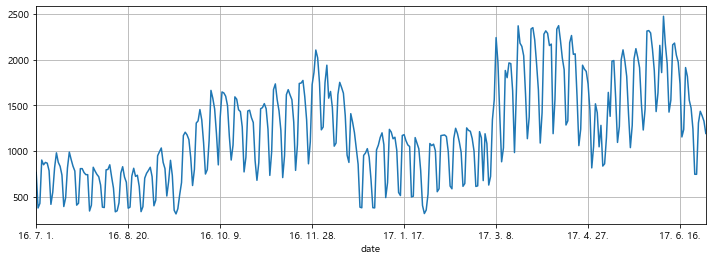

In [4]:
pinkwink_web['hit'].plot(figsize=(12,4), grid=True);

In [5]:
time = np.arange(0,len(pinkwink_web))
traffic = pinkwink_web['hit'].values

fx = np.linspace(0, time[-1], 1000)

In [6]:
def error(f, x, y):
    return np.sqrt(np.mean((f(x)-y)**2))

In [7]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.8597308110963
430.62841018946943
429.53280466762925
330.47773026564636


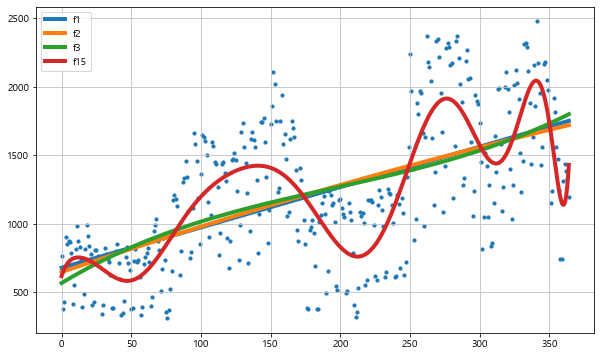

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s=10)

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')

plt.legend(loc=2)
plt.show()

### 2. Prophet 모듈을 이용한 forecast 예측

In [12]:
df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})
df.reset_index(inplace=True)
df['ds'] = pd.to_datetime(df['ds'], format="%y. %m. %d.")
del df['date']

m = Prophet(yearly_seasonality=True)
m.fit(df);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [14]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,912.761130,681.163382,1135.088712
421,2017-08-26,497.711704,270.981064,699.129417
422,2017-08-27,630.268176,414.262948,863.378661
423,2017-08-28,1182.888299,976.789413,1398.050449
424,2017-08-29,1218.800002,1014.077803,1434.625023


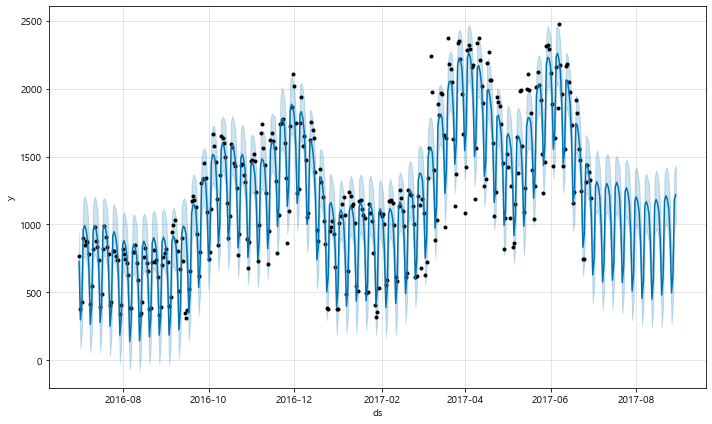

In [16]:
m.plot(forecast);

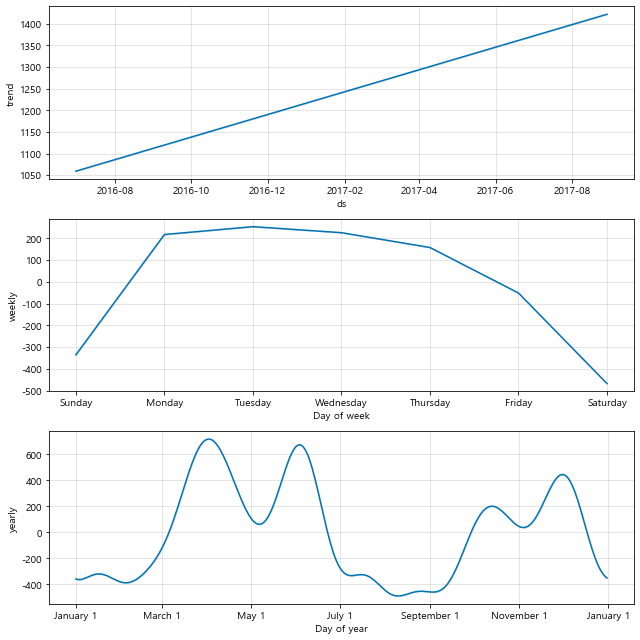

In [19]:
m.plot_components(forecast);

### 3. Seasonal 시계열 분석으로 주식 데이터 분석하기

In [29]:
from pandas_datareader import data
import yfinance as yf
yf.pdr_override()

start_date = '2003-01-01'
end_date = '2017-06-30'
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)
KIA.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-01-02,9000.0,9200.0,8950.0,9190.0,7143.416016,688900
2003-01-03,9350.0,9720.0,9330.0,9550.0,7423.246582,1419800
2003-01-06,9720.0,9760.0,9500.0,9700.0,7539.842285,1076300
2003-01-07,9900.0,9920.0,9420.0,9420.0,7322.196777,1034100
2003-01-08,9500.0,9740.0,9400.0,9520.0,7399.926758,599800


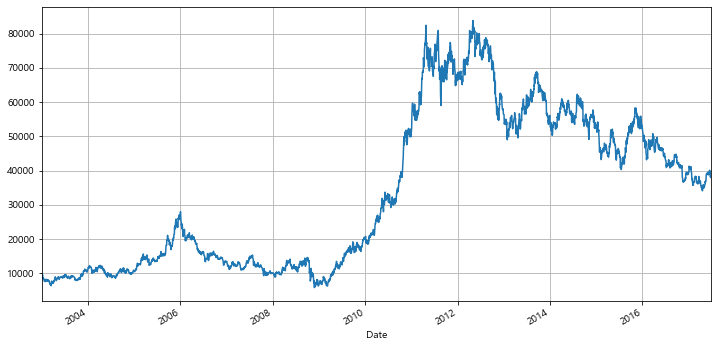

In [30]:
KIA['Close'].plot(figsize=(12,6), grid=True);

In [32]:
KIA_trunc = KIA[:'2016-12-31']
KIA_trunc.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-23,38700.0,39350.0,38650.0,39100.0,36095.636719,1070783
2016-12-26,39100.0,39350.0,38850.0,39000.0,36003.320312,465612
2016-12-27,39050.0,39700.0,39050.0,39500.0,36464.902344,879686
2016-12-28,38600.0,39100.0,38600.0,38950.0,36987.187500,662314
2016-12-29,38700.0,39400.0,38700.0,39250.0,37272.066406,586340


In [33]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2003-01-02,9190.0
1,2003-01-03,9550.0
2,2003-01-06,9700.0
3,2003-01-07,9420.0
4,2003-01-08,9520.0


In [34]:
m = Prophet()
m.fit(df);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [35]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3832,2017-12-25
3833,2017-12-26
3834,2017-12-27
3835,2017-12-28
3836,2017-12-29


In [38]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3832,2017-12-25,34453.768622,24842.769321,45166.167044
3833,2017-12-26,34491.044584,24520.593993,44758.348556
3834,2017-12-27,34454.314284,24248.330902,45149.891363
3835,2017-12-28,34397.569685,24094.570234,45367.753572
3836,2017-12-29,34304.374241,24064.722176,44606.316055


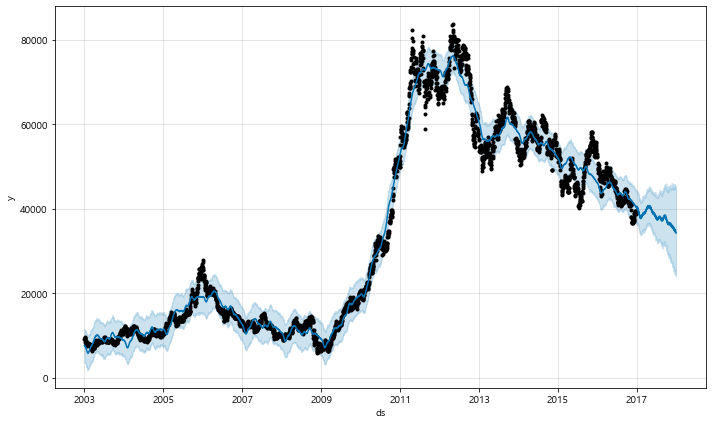

In [41]:
m.plot(forecast);

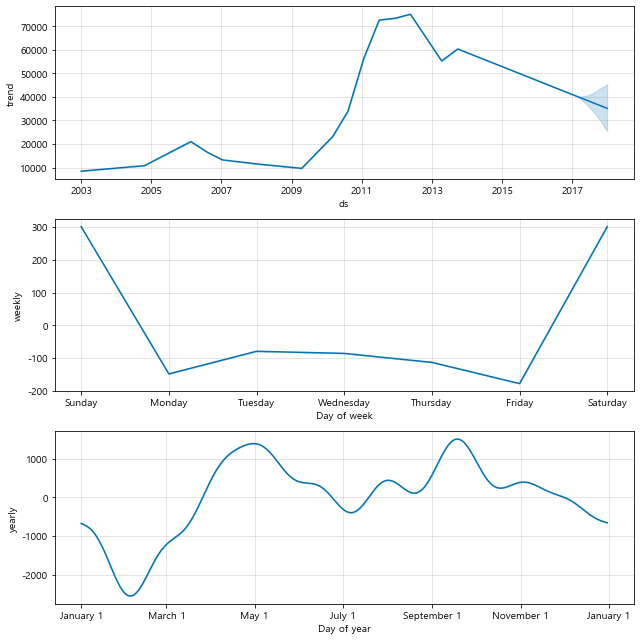

In [42]:
m.plot_components(forecast);

[*********************100%***********************]  1 of 1 completed


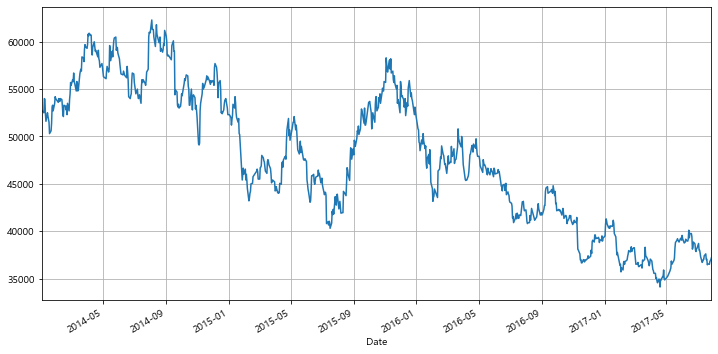

In [43]:
start_date = '2014-01-01'
end_date = '2017-07-31'
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)
KIA['Close'].plot(figsize=(12,6), grid=True);

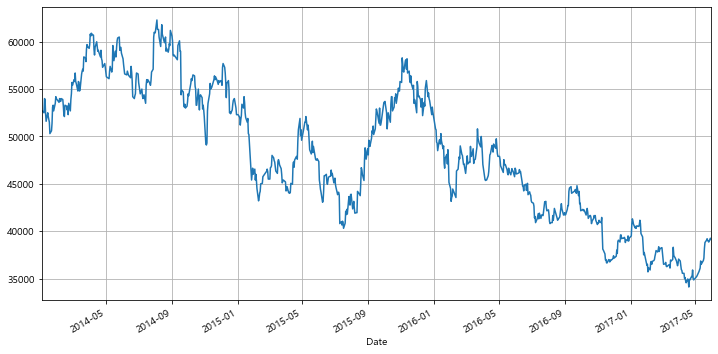

In [44]:
KIA_trunc = KIA[:'2017-05-31']
KIA_trunc['Close'].plot(figsize=(12,6), grid=True);

In [45]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']

In [46]:
m = Prophet(daily_seasonality=True)
m.fit(df);

In [48]:
future = m.make_future_dataframe(periods=61)
future.tail()

,ds
897,2017-07-27
898,2017-07-28
899,2017-07-29
900,2017-07-30
901,2017-07-31


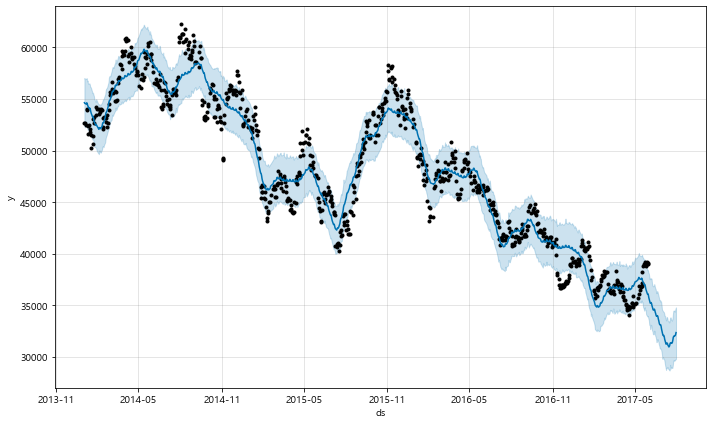

In [49]:
forecast = m.predict(future)
m.plot(forecast);

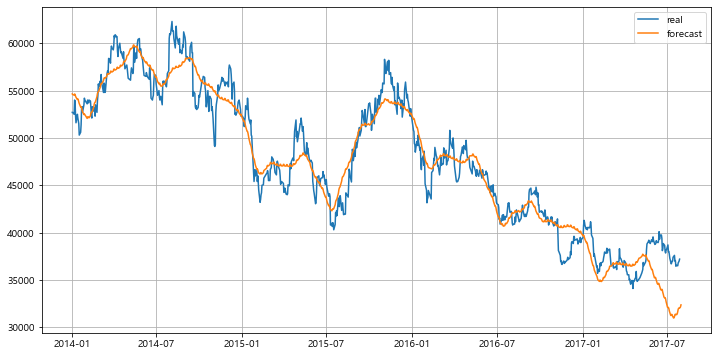

In [50]:
plt.figure(figsize=(12,6))
plt.plot(KIA.index, KIA['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

### 4. Growth Model과 Holiday Forecast

In [51]:
df = pd.read_csv('data/example_wp_R.csv')
df['y'] = np.log(df['y'])

In [52]:
df['cap'] = 8.5

In [53]:
m = Prophet(growth='logistic')
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


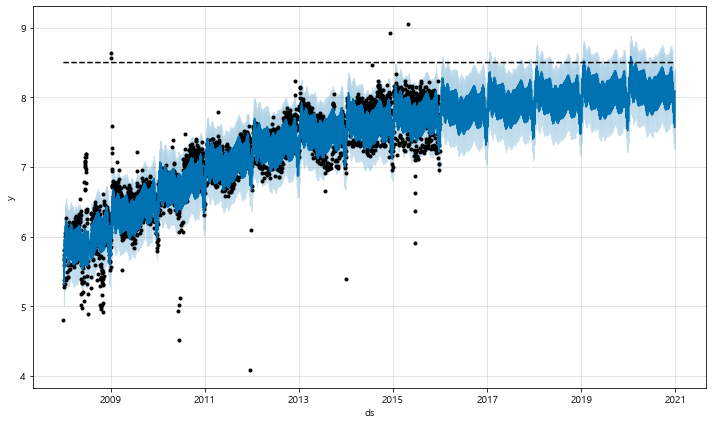

In [54]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst);

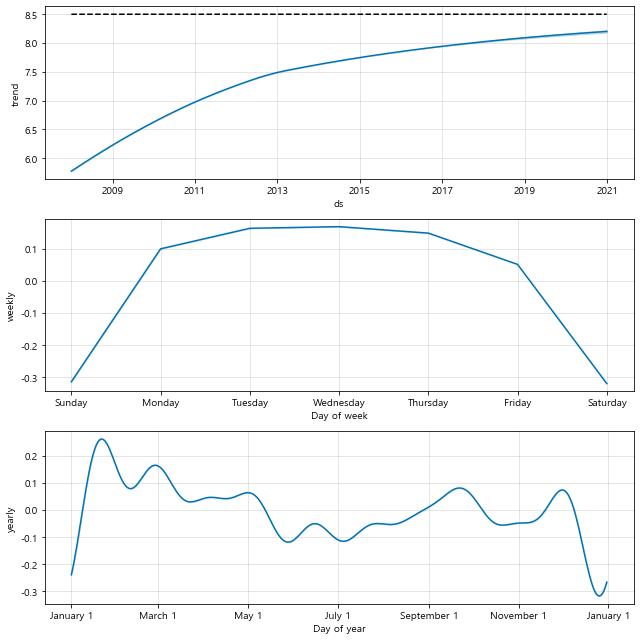

In [55]:
forecast = m.predict(future)
m.plot_components(forecast);

### Holiday

In [56]:
df = pd.read_csv('data/example_wp_peyton_manning.csv')
df['y'] = np.log(df['y'])
m = Prophet(daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=366)

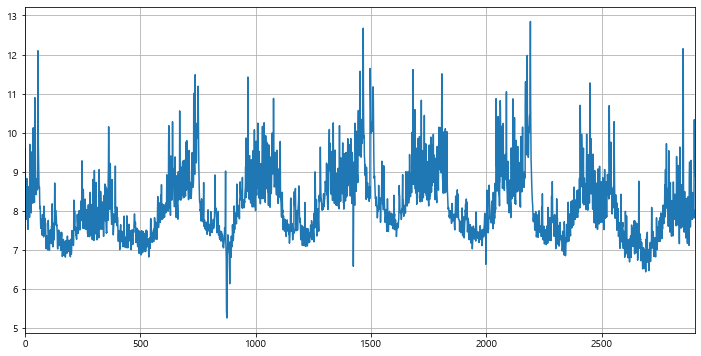

In [57]:
df.y.plot(figsize=(12,6), grid=True);

In [58]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [59]:
m = Prophet(holidays=holidays, daily_seasonality=True)
forecast = m.fit(df).predict(future)

In [60]:
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
        ['ds', 'playoff', 'superbowl']][-10:]

,ds,playoff,superbowl
2190,2014-02-02,1.224116,1.203719
2191,2014-02-03,1.902824,1.458890
2532,2015-01-11,1.224116,0.000000
2533,2015-01-12,1.902824,0.000000
2901,2016-01-17,1.224116,0.000000
2902,2016-01-18,1.902824,0.000000
2908,2016-01-24,1.224116,0.000000
2909,2016-01-25,1.902824,0.000000
2922,2016-02-07,1.224116,1.203719
2923,2016-02-08,1.902824,1.458890


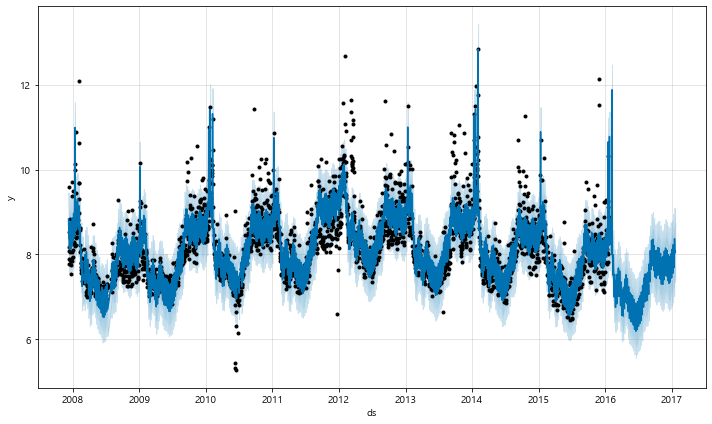

In [61]:
m.plot(forecast);

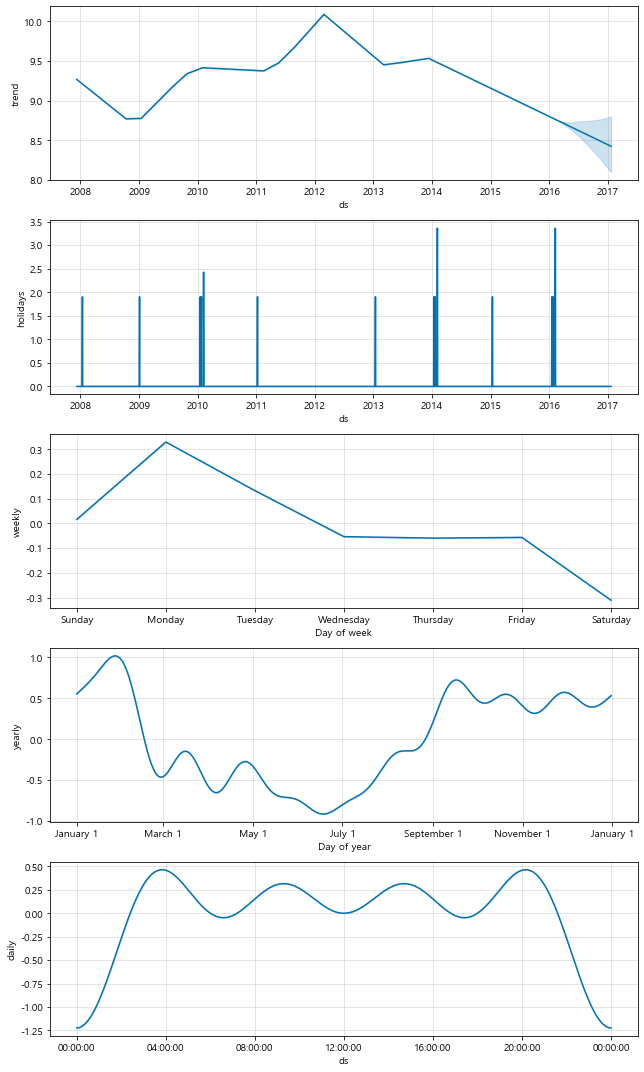

In [62]:
m.plot_components(forecast);